In [1]:
using Pkg
#Pkg.update()
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("Missings")
#Pkg.add ("Statistics")
#Pkg.add("Plots")

using CSV
using DataFrames
using Missings
using Statistics
using Plots

# Lectura del archivo de datos con formato CSV y generación del DataFrame
file_path = "../dat/bottle.csv"
data = CSV.read(file_path, DataFrame)

# DataShape del DataFrame (Obtención de renglones y columnas)
n_rows, n_cols = size(data)

println("PUNTO 1: dataShape")
println("Número de filas: $n_rows")
println("Número de columnas: $n_cols")



PUNTO 1: dataShape
Número de filas: 864863
Número de columnas: 74


In [ ]:
println("PUNTO 2: dataType")
# DataType del DataFrame (Obtención de los nombres y tipos de las columnas)

info_columnas = DataFrame(
    Columna = names(data),
    Tipo_de_Dato = eltype.(eachcol(data))
)

# Guarda el DataFrame en un archivo CSV
output_path = "../dat/info_columnas.csv"  # Nombre del archivo de salida
CSV.write(output_path, info_columnas)

println("La información de las columnas se ha guardado en: $output_path")

PUNTO 2: dataType
La información de las columnas se ha guardado en: ../dat/info_columnas.csv


In [4]:
println("PUNTO 3: count_missing")
# Contar valores faltantes por columna

# Crea un DataFrame para almacenar la información
missing_info = DataFrame(Columna = String[], Missing_Count = Int[])

# Itera sobre las columnas y calcula los valores faltantes
for (name, col) in zip(names(data), eachcol(data))
    missing_count = sum(ismissing, col)
    push!(missing_info, (name, missing_count))  # Agrega la  fila al DataFrame
end

# Guardar el DataFrame en un archivo CSV
output_path = "../dat/valores_faltantes.csv"  # Nombre del archivo de salida
CSV.write(output_path, missing_info)

println("La información de valores faltantes se ha guardado en: $output_path")

PUNTO 3: count_missing
La información de valores faltantes se ha guardado en: ../dat/valores_faltantes.csv


In [ ]:
println("PUNTO 4: dataMissingPercentage")
println("Porcentaje de valores faltantes")

# Crea un DataFrame para almacenar los resultados
missing_data_info = DataFrame(Columna = String[], Missing_Count = Int[], Missing_Percentage = Float64[])

# Itera sobre las columnas del DataFrame original
total_rows = size(data, 1)  # Número total de filas
for (name, col) in zip(names(data), eachcol(data))
    missing_count = sum(ismissing, col)  # Conteo de valores nulos
    missing_percentage = (missing_count / total_rows) * 100  # Porcentaje de valores nulos
    # Agrega los resultados al DataFrame
    push!(missing_data_info, (name, missing_count, missing_percentage))
end

# Guarda el DataFrame en un archivo CSV
output_path = "../dat/porcentaje_faltante.csv"  # Nombre del archivo de salida
CSV.write(output_path, missing_data_info)

println("La información del porcentaje de valores faltantes se ha guardado en: $output_path")

PUNTO 4: dataMissingPercentage
Porcentaje de valores faltantes
La información del porcentaje de valores faltantes se ha guardado en: ../dat/porcentaje_faltante.csv


In [7]:
println("PUNTO 5: deletColumns")

# Definición del porcentaje límite
threshold = 50.0  

# Filtrado de columnas
total_rows = size(data, 1)  # Número total de renglones

# Encuentra las columnas que cumplen con el umbral de valores faltantes
columns_to_keep = [name for (name, col) in zip(names(data), eachcol(data)) if (sum(ismissing, col) / total_rows) * 100 <= threshold]

# Filtra el DataFrame para incluir solo las columnas seleccionadas
filtered_data = select(data, columns_to_keep)


# Guardar el DataFrame filtrado en un archivo CSV
output_path = "../dat/filtrado.csv"  # Nombre del archivo de salida
CSV.write(output_path, filtered_data)

println("El archivo CSV ha sido guardado en: $output_path")



PUNTO 5: deletColumns
El archivo CSV ha sido guardado en: ../dat/filtrado.csv


PUNTO 6: calculateCorrelation
PUNTO 7: displayCorrelation
Matriz de correlación:
[1.0 0.9993450094378054 -0.16222238751806148 -0.10014210235635747 -0.16221971496243487 -0.1619607149922167; 0.9993450094378054 1.0 -0.16161667042737554 -0.1008277193956823 -0.16161392343184508 -0.16134761606705536; -0.16222238751806148 -0.16161667042737554 1.0 0.08231579840340959 0.9999999972815439 0.9999939222811631; -0.10014210235635747 -0.1008277193956823 0.08231579840340959 1.0 0.08231705049444037 0.08218347201418404; -0.16221971496243487 -0.16161392343184508 0.9999999972815439 0.08231705049444037 1.0 0.9999939296558072; -0.1619607149922167 -0.16134761606705536 0.9999939222811631 0.08218347201418404 0.9999939296558072 1.0]
Matriz de correlación con etiquetas:
6×6 DataFrame
 Row │ Cst_Cnt    Btl_Cnt    Depthm      RecInd      R_Depth     R_PRES     
     │ Float64    Float64    Float64     Float64     Float64     Float64    
─────┼──────────────────────────────────────────────────────────────────────
  

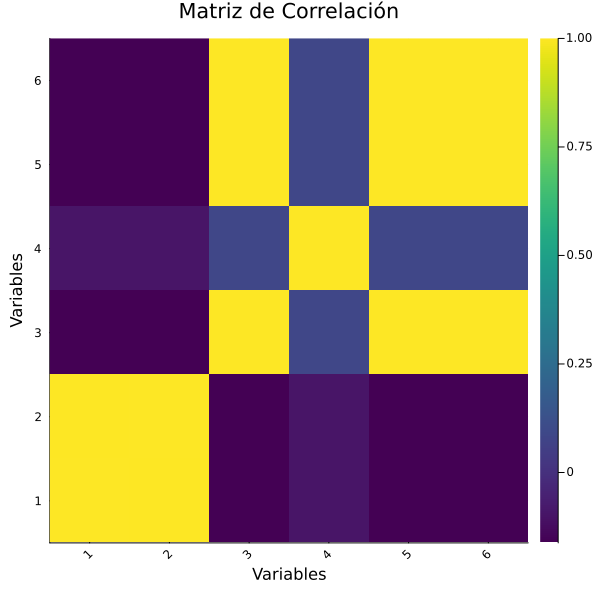

In [10]:
println("PUNTO 6: calculateCorrelation")
println("PUNTO 7: displayCorrelation")
# Creación de la matriz ce correlación

# Filtrado de columnas numericas, extrayendo los nombres de las columnas
numeric_cols = filter(c -> eltype(data[!, c]) <: Number, names(data))
data_matrix = Matrix(select(data, numeric_cols))
correlation_matrix = cor(data_matrix)

println("Matriz de correlación:")
println(correlation_matrix)


# Despliegue de la matriz de correlación con los nombres de las columnas
# pasandolo a un DataFrame:
correlation_df = DataFrame(correlation_matrix, :auto)
rename!(correlation_df, names(select(data, numeric_cols)))

println("Matriz de correlación con etiquetas:")
println(correlation_df)

#Despliegue utilizando o heatmap
heatmap(correlation_matrix, color=:viridis, xrotation=45,
 title="Matriz de Correlación", xlabel="Variables", ylabel="Variables", size=(600,600))
 


In [ ]:
println("PUNTO 8: removeOutliersIQR")

# Función para borrar outliers usando IQR
function borrado_outliers(df::DataFrame)
    # Identificación de columnas numericas
    numeric_cols = names(df, eltype.(eachcol(df)) .== Float64)
    
    # Filtrado de renglones con el criterio de IQR para columnas numericas
    for col in numeric_cols
        Q1 = quantile(df[!, col], 0.25)  # Primer quartil
        Q3 = quantile(df[!, col], 0.75)  # Tercer quartil
        IQR = Q3 - Q1                   # Rango intercuartilar
        
        # Definición de cotas superior e inferior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrado de renglones 
        df = filter(row -> lower_bound <= row[col] <= upper_bound, df)
    end
    
    return df
end

datos_limpios = borrado_outliers(data)

println("Renglones iniciales: $(size(data, 1))")
println("Renglones limpios: $(size(datos_limpios, 1))")


# Guardar el DataFrame con el borrado de outliers en un archivo CSV
output_path = "../dat/borra_outl.csv"  # Nombre del archivo de salida
CSV.write(output_path, datos_limpios)

println("El archivo CSV ha sido guardado en: $output_path")


PUNTO 8: removeOutliersIQR
Renglones iniciales: 864863
Renglones limpios: 810084
El archivo CSV ha sido guardado en: ../dat/borra_outl.csv


In [9]:
println("PUNTO 9: deleteRow")

# Borra renglones con valores nulos en una columna específica "Salnty"
cleaned_data = dropmissing(data, :Salnty)

# Extraer una columna específica
columna_a_guardar = cleaned_data[:, :Salnty]  # Accede a la columna "Salnty"

# Convertir la columna en un DataFrame para guardarla
columna_df = DataFrame(Salnty = columna_a_guardar)

# Guardar en un archivo CSV
CSV.write("../dat/sinfilasnulas.csv", columna_df)

println("Columna guardada en 'sinfilasnulas.csv'")





PUNTO 9: deleteRow
Columna guardada en 'sinfilasnulas.csv'


In [18]:
println("PUNTO 10: filterColumnsByCorrelation")

# Eliminación de todas las columnas en función del límite dado para una columna y relación 
# objetivo

# Límite para la correlación
threshold = 0.8

# Columna objetivo
target_col = :Salnty

# Filtrado de columnas basado en la correlación con la columna objetivo
println("Antes de numerical_cols")
numerical_cols = filter(c -> eltype(data[!, c]) <: Number, names(data))

println("Antes de correlated_cols")
#correlated_cols = filter(c -> abs(cor(data[!, target_col], data[!, c])) >= threshold, numerical_cols)
#= correlated_cols = filter(c -> begin
    x = skipmissing(data[!, target_col])
    y = skipmissing(data[!, c])
    !any(ismissing, data[!, c]) && abs(cor(x, y)) >= threshold
end, numerical_cols)
 =#

correlated_cols = filter(c -> begin
    x = collect(skipmissing(data[!, target_col]))
    y = collect(skipmissing(data[!, c]))
    x = Float64.(x)  # Asegurar tipos compatibles
    y = Float64.(y)

    non_missing_indices = .!(ismissing.(data[!, target_col]) .| ismissing.(data[!, c]))
    x = data[non_missing_indices, target_col]
    y = data[non_missing_indices, c]


    abs(cor(x, y)) >= threshold
end, numerical_cols)




# Creación de un DataFrame nuevo con las columnas filtradas
filtered_data = data[:, correlated_cols]

println("DataFrame filtrado:")
# Guardar en un archivo CSV
CSV.write("../dat/columnasXcorrelacion.csv", filtered_data)

println("Columna guardada en 'columnasXcorrelacion.csv'")

#println(filtered_data)


# Filtrar columnas numéricas
#numerical_cols = filter(c -> eltype(data[!, c]) <: Number, names(data))

# Filtrar columnas correlacionadas sin errores por valores `missing`

# Crear un nuevo DataFrame con las columnas filtradas
#filtered_data = data[:, correlated_cols]

#println("Filtered DataFrame:")
#println(filtered_data)


PUNTO 10: filterColumnsByCorrelation
Antes de numerical_cols
Antes de correlated_cols
DataFrame filtrado:
Columna guardada en 'columnasXcorrelacion.csv'


In [38]:
println("PUNTO 11: describe()")

# Esta función se usa para describir datos de un DataFrame, proporcionando información
# relevante de cada columna

 describe_data = describe(data)

 # Llenado de los espacios nothing con missing del resultado de la función describe(data)
 for col in names(describe_data)
 describe_data[!, col] = replace(describe_data[!, col], nothing => missing)
end

println(" Generación del archivo describedatos.csv el cual contiene la descripción de las columnas")
CSV.write("../dat/describedatos.csv", describe_data)


PUNTO 11: describe()
 Generación del archivo describedatos.csv el cual contiene la descripción de las columnas


"../dat/describedatos.csv"